In [7]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as scp

In [8]:
song10s = pd.read_csv("../2010.csv")
year_df = song10s["year"]
bpm_df = song10s["bpm"]
dnce_df = song10s["dnce"]
dB_df = song10s["dB"]
live_df = song10s["live"]
val_df = song10s["val"]
dur_df = song10s["dur"]
acous_df = song10s["acous"]
spch_df = song10s["spch"]
popularity_df = song10s["popularity"]

In [9]:
song10s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          101 non-null    object 
 1   artist         101 non-null    object 
 2   genre          101 non-null    object 
 3   year           101 non-null    int64  
 4   bpm            101 non-null    int64  
 5   nrgy           101 non-null    int64  
 6   dnce           101 non-null    int64  
 7   dB             101 non-null    int64  
 8   live           101 non-null    int64  
 9   val            101 non-null    int64  
 10  dur            101 non-null    int64  
 11  acous          101 non-null    int64  
 12  spch           101 non-null    int64  
 13  popularity     101 non-null    int64  
 14  has_win_award  101 non-null    float64
dtypes: float64(1), int64(11), object(3)
memory usage: 12.0+ KB


In [24]:
song10s.isnull().sum()

title            0
artist           0
genre            0
year             0
bpm              0
nrgy             0
dnce             0
dB               0
live             0
val              0
dur              0
acous            0
spch             0
popularity       0
has_win_award    0
dtype: int64

# Descriptive Statistics

In [14]:
# Compute additional information
dfs = ["bpm", "dnce", "dB", "live", "val", "dur", "acous", "spch", "popularity"]
stats_dfs = []

for df in dfs:
    curr_df  = song10s[df]
    Q1 = np.percentile(curr_df, 25)
    Q3 = np.percentile(curr_df, 75)
    IQR = Q3-Q1  # Interquartile range

    stats = [
        ['Mean', np.mean(curr_df)],
        ['Median', np.median(curr_df)],
        ['Mode', scp.mode(curr_df)[0][0]],
        ['Standard Deviation', np.std(curr_df)],
        ['Variance', np.var(curr_df)],
        ['Minimum', np.min(curr_df)],
        ['Maximum', np.max(curr_df)],
        ['Q1', Q1],
        ['Q3', Q3],
        ['IQR', IQR],
        ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
        ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
    ]

    print(f'{df.upper()} Description')
    display(pd.DataFrame(stats, columns=['Measure', 'Value']))

BPM Description


,Measure,Value
0,Mean,118.504950
1,Median,120.000000
2,Mode,122.000000
3,Standard Deviation,22.270446
4,Variance,495.972748
5,Minimum,75.000000
6,Maximum,186.000000
7,Q1,100.000000
8,Q3,134.000000
9,IQR,34.000000


DNCE Description


,Measure,Value
0,Mean,65.386139
1,Median,67.000000
2,Mode,74.000000
3,Standard Deviation,11.763318
4,Variance,138.375649
5,Minimum,21.000000
6,Maximum,91.000000
7,Q1,58.000000
8,Q3,74.000000
9,IQR,16.000000


DB Description


,Measure,Value
0,Mean,-5.475248
1,Median,-5.000000
2,Mode,-5.000000
3,Standard Deviation,1.988054
4,Variance,3.952358
5,Minimum,-13.000000
6,Maximum,-2.000000
7,Q1,-6.000000
8,Q3,-4.000000
9,IQR,2.000000


LIVE Description


,Measure,Value
0,Mean,17.831683
1,Median,13.000000
2,Mode,8.000000
3,Standard Deviation,13.720022
4,Variance,188.238996
5,Minimum,3.000000
6,Maximum,82.000000
7,Q1,9.000000
8,Q3,25.000000
9,IQR,16.000000


VAL Description


,Measure,Value
0,Mean,46.683168
1,Median,47.000000
2,Mode,56.000000
3,Standard Deviation,21.002560
4,Variance,441.107538
5,Minimum,9.000000
6,Maximum,97.000000
7,Q1,29.000000
8,Q3,61.000000
9,IQR,32.000000


DUR Description


,Measure,Value
0,Mean,209.247525
1,Median,209.000000
2,Mode,203.000000
3,Standard Deviation,23.853267
4,Variance,568.978335
5,Minimum,157.000000
6,Maximum,306.000000
7,Q1,194.000000
8,Q3,222.000000
9,IQR,28.000000


ACOUS Description


,Measure,Value
0,Mean,14.752475
1,Median,9.000000
2,Mode,0.000000
3,Standard Deviation,17.738701
4,Variance,314.661504
5,Minimum,0.000000
6,Maximum,84.000000
7,Q1,4.000000
8,Q3,19.000000
9,IQR,15.000000


SPCH Description


,Measure,Value
0,Mean,8.396040
1,Median,6.000000
2,Mode,4.000000
3,Standard Deviation,7.755010
4,Variance,60.140182
5,Minimum,3.000000
6,Maximum,46.000000
7,Q1,4.000000
8,Q3,10.000000
9,IQR,6.000000


POPULARITY Description


,Measure,Value
0,Mean,76.039604
1,Median,78.000000
2,Mode,83.000000
3,Standard Deviation,9.144517
4,Variance,83.622194
5,Minimum,32.000000
6,Maximum,94.000000
7,Q1,72.000000
8,Q3,82.000000
9,IQR,10.000000


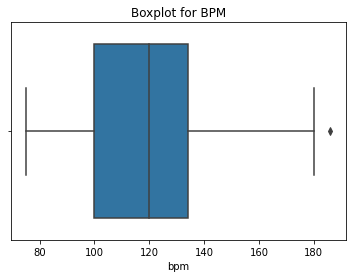

Outlier exists? True 
----------------------------------------------


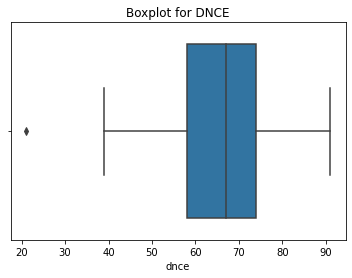

Outlier exists? False 
----------------------------------------------


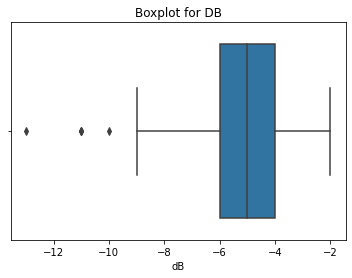

Outlier exists? False 
----------------------------------------------


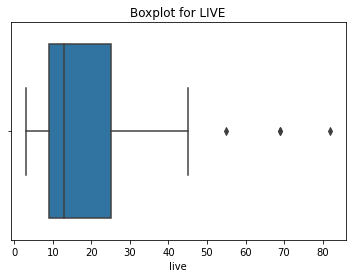

Outlier exists? True 
----------------------------------------------


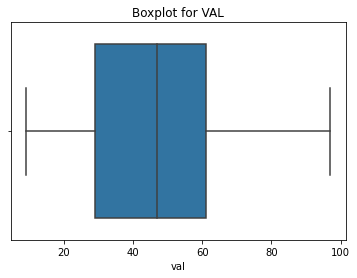

Outlier exists? False 
----------------------------------------------


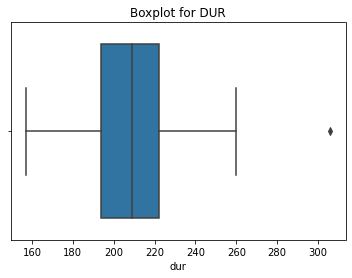

Outlier exists? True 
----------------------------------------------


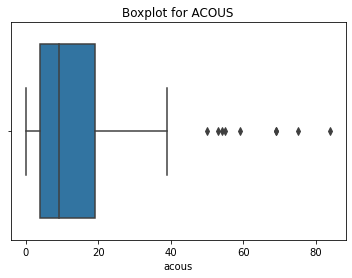

Outlier exists? True 
----------------------------------------------


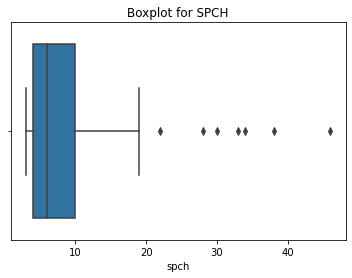

Outlier exists? True 
----------------------------------------------


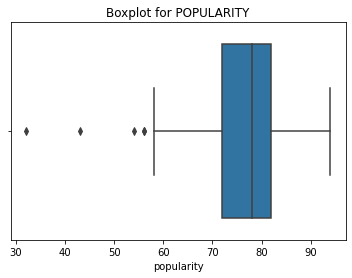

Outlier exists? False 
----------------------------------------------


In [15]:
## Boxplot visualization
for df in dfs:
    plt.title(f'Boxplot for {df.upper()}')
    sns.boxplot(x=df, data=song10s)
    plt.show()

    curr_df  = song10s[df]
    Q1 = np.percentile(curr_df, 25)
    Q3 = np.percentile(curr_df, 75)
    IQR = Q3-Q1  # Interquartile range

    RLB = Q1 - 1.5*IQR
    RUB = Q3 + 1.5*IQR
    print("Outlier exists?", np.max(curr_df) > RUB, "\n----------------------------------------------")

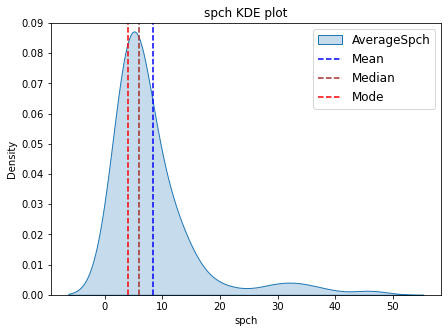

In [21]:
plt.figure(figsize=(7,5))
plt.gca().set_ylim([None, 0.09])
sns.kdeplot(data = song10s["spch"], shade=True)
plt.vlines(x=np.mean(song10s["spch"]), ymin=0, ymax=0.1, color='blue', linestyle='--')
plt.vlines(x=np.median(song10s["spch"]), ymin=0, ymax=0.1, color='brown', linestyle='--')
plt.vlines(x=scp.mode(song10s["spch"])[0][0], ymin=0, ymax=0.1, color='red', linestyle='--')
plt.legend([f'Average{"spch".capitalize()}', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.title(f'spch KDE plot')
plt.show()

As we can see, the spch data is positively skewed where the mode < median < mean. From this KDE plot we can visually infer that the dataset contains values much greater than the mean in the song speech column. (the higher the value the more spoken words the song contains)

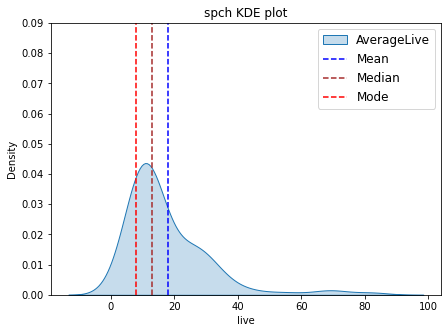

In [22]:
plt.figure(figsize=(7,5))
plt.gca().set_ylim([None, 0.09])
sns.kdeplot(data = song10s["live"], shade=True)
plt.vlines(x=np.mean(song10s["live"]), ymin=0, ymax=0.1, color='blue', linestyle='--')
plt.vlines(x=np.median(song10s["live"]), ymin=0, ymax=0.1, color='brown', linestyle='--')
plt.vlines(x=scp.mode(song10s["live"])[0][0], ymin=0, ymax=0.1, color='red', linestyle='--')
plt.legend([f'Average{"live".capitalize()}', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.title(f'spch KDE plot')
plt.show()

As we can see, the live data is positively skewed where the mode < median < mean. From this KDE plot we can visually infer that the dataset contains values much greater than the mean in the song live column. (how likely the song was a live recording)

# Exploring Data

Background, as I have spotify song dataset with its attribute, I wonder what kind of insight i can get. The feature that struck me the most is popularity, so i wonder if i can try to predict if a song will be popular or not based on its musical attribute. If i manage to pull this off, then it will be beneficial to artist. They can try to predict if their song will be popular or not by providing the attribute needed.

First, lets check the correlation between each numerical feature to try and understand the data a bit more

<ipython-input-25-91fceda1a24e>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(song10s[song10s.columns].corr(), dtype=np.bool)


<AxesSubplot:title={'center':'2010 Song Correlation Matrix'}>

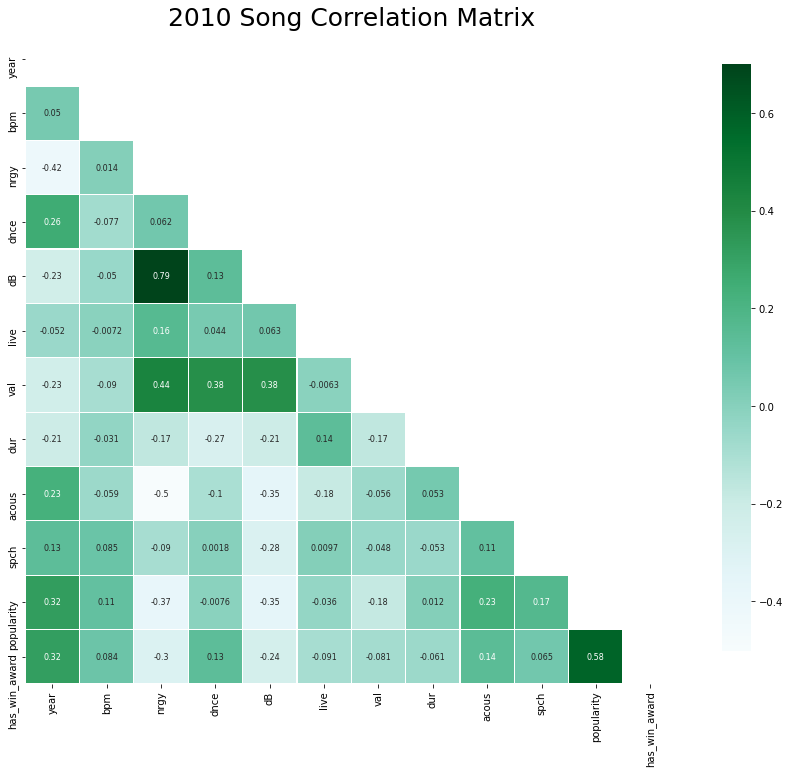

In [25]:
mask = np.zeros_like(song10s[song10s.columns].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16,12))
plt.title("2010 Song Correlation Matrix", fontsize = 25)

sns.heatmap(song10s[song10s.columns].corr(),linewidths=.25,vmax=.7,square=True,cmap="BuGn",linecolor='w',annot=True,
           annot_kws={"size":8}, mask=mask, cbar_kws={"shrink":.9})

From the correlation matrix above, we can see that popularity have a fairly positive correlation with has_win_award, based on this we can infer that most popular song have win award. We can also see that dB have a good correlation with nrgy. Now lets try to dive deeper what makes a song popular.

As stated previously, we know that popularity have a good correlation with has_win_award, now lets try to dive deeper why a song wins an award

In [26]:
win_corr = song10s[song10s['has_win_award'] == 1]

In [29]:
win_corr.head()

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award
1,7 rings,Ariana Grande,dance pop,2019,140,32,78,-11,9,33,179,59,33,90,1.0
2,Old Town Road - Remix,Lil Nas X,country rap,2019,136,62,88,-6,11,64,157,5,10,89,1.0
3,SeÃ±orita,Shawn Mendes,canadian pop,2019,117,55,76,-6,8,75,191,4,3,88,1.0
4,rockstar (feat. 21 Savage),Post Malone,dfw rap,2018,160,52,59,-6,13,13,218,12,7,88,1.0
5,SAD!,XXXTENTACION,emo rap,2018,75,61,74,-5,12,47,167,26,14,87,1.0


<ipython-input-31-f8fcf9995f82>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(win_corr[win_corr.columns].corr(), dtype=np.bool)


<AxesSubplot:title={'center':'2010 Song That Win Award Correlation Matrix'}>

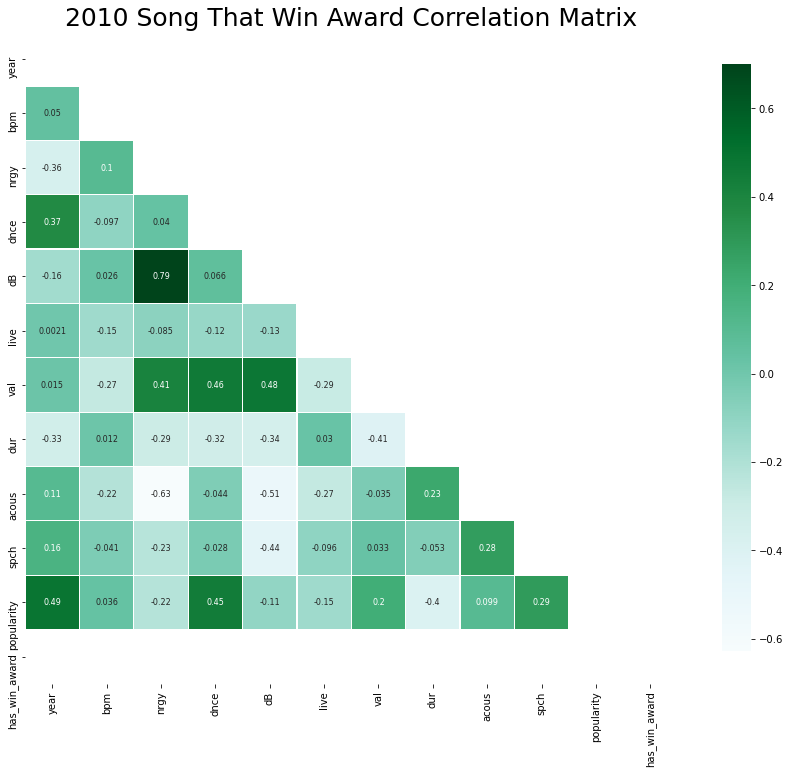

In [31]:
mask = np.zeros_like(win_corr[win_corr.columns].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16,12))
plt.title("2010 Song That Win Award Correlation Matrix", fontsize = 25)

sns.heatmap(win_corr[win_corr.columns].corr(),linewidths=.25,vmax=.7,square=True,cmap="BuGn",linecolor='w',annot=True,
           annot_kws={"size":8}, mask=mask, cbar_kws={"shrink":.9})

# What makes music win an award?

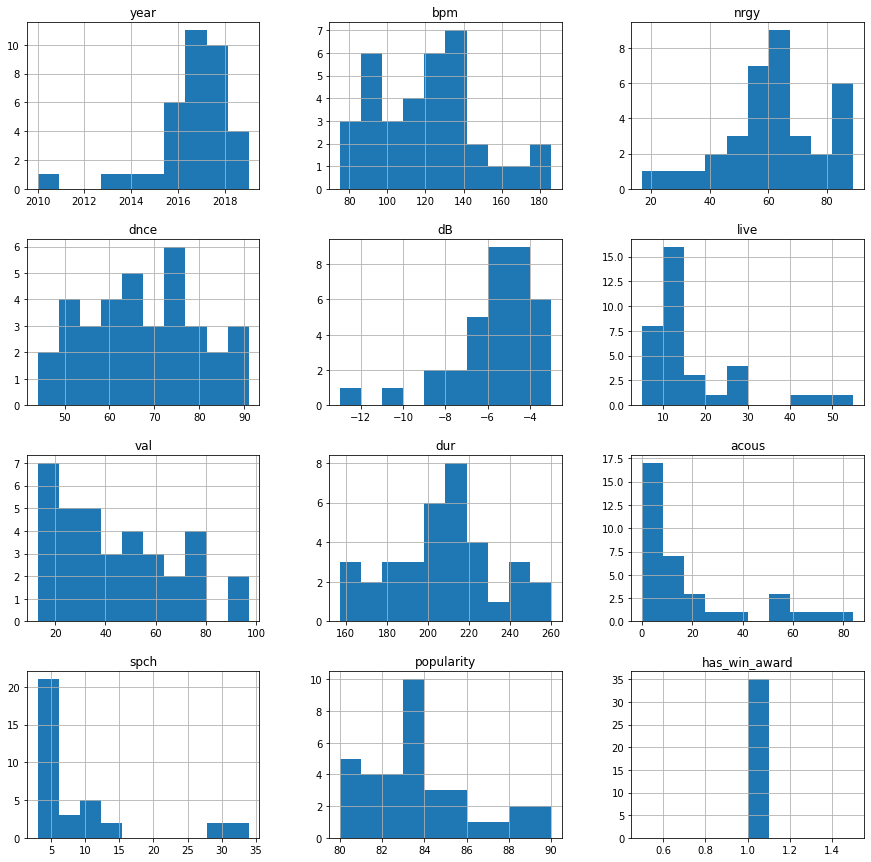

In [33]:
win_corr.hist(figsize=(15, 15))
plt.show()

From the plots above, we can see that a winning award song have low spch, this means that the lyric is cycled throughout the song, the duration is mostly around 3 minutes and it also have high energy. Having high energy also translate having listener to dance along. Low spch will make it easier for listener to sing along. A winning award song is loud, punchy, mostly have good mood theme.